## Bag of words approach (Baseline solution)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2
import numpy as np
from scipy.cluster.vq import *
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

## Reading labels.csv
It contains guid/image, label columns

In [40]:
df = pd.read_csv('labels.csv')
df[:5]

,guid/image,label
0,01aaa345-52ad-4939-8207-2d39c11acfdc/0000,0
1,01aaa345-52ad-4939-8207-2d39c11acfdc/0001,1
2,01aaa345-52ad-4939-8207-2d39c11acfdc/0002,0
3,01aaa345-52ad-4939-8207-2d39c11acfdc/0003,1
4,01aaa345-52ad-4939-8207-2d39c11acfdc/0004,1


## Form complete path to training images

In [41]:
image_paths = 'trainval/'+df['guid/image']+'_image.jpg'
image_paths = image_paths.to_list()
labels = df['label'].to_list()
for a,b in zip(image_paths[:5], labels[:5]):
    print('path: {}, label: {}'.format(a,b))

path: trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0000_image.jpg, label: 0
path: trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0001_image.jpg, label: 1
path: trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0002_image.jpg, label: 0
path: trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0003_image.jpg, label: 1
path: trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0004_image.jpg, label: 1


## Labels
- (0) Unknown, Boats, Helicopters, Planes, Trains
- (1) Cars
- (2) Industrial, Utility, Vans, Emergency, Military, Commericial
- (3) Motorcycles, OffRoad, Cycles

2


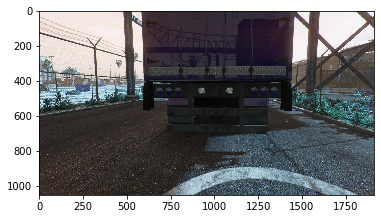

In [62]:
idx = np.random.randint(0, 500)
test_image = cv2.imread(image_paths[idx])
plt.imshow(test_image)
print(labels[idx])

## Create "codewords" using SURF

In [5]:
# SURF Feature detection + descriptors
surf = cv2.xfeatures2d.SURF_create()
descriptors_list = []
for path in image_paths:
    print('Processing {:d}/{:d} images'.format(image_paths.index(path),len(image_paths)-1))
    im = cv2.imread(path)
    kp, des = surf.detectAndCompute(im, None)
    descriptors_list.append((path,des))

Processing 0/5560 images
Processing 1/5560 images
Processing 2/5560 images
Processing 3/5560 images
Processing 4/5560 images
Processing 5/5560 images
Processing 6/5560 images
Processing 7/5560 images
Processing 8/5560 images
Processing 9/5560 images
Processing 10/5560 images
Processing 11/5560 images
Processing 12/5560 images
Processing 13/5560 images
Processing 14/5560 images
Processing 15/5560 images
Processing 16/5560 images
Processing 17/5560 images
Processing 18/5560 images
Processing 19/5560 images
Processing 20/5560 images
Processing 21/5560 images
Processing 22/5560 images
Processing 23/5560 images
Processing 24/5560 images
Processing 25/5560 images
Processing 26/5560 images
Processing 27/5560 images
Processing 28/5560 images
Processing 29/5560 images
Processing 30/5560 images
Processing 31/5560 images
Processing 32/5560 images
Processing 33/5560 images
Processing 34/5560 images
Processing 35/5560 images
Processing 36/5560 images
Processing 37/5560 images
Processing 38/5560 ima

Processing 308/5560 images
Processing 309/5560 images
Processing 310/5560 images
Processing 311/5560 images
Processing 312/5560 images
Processing 313/5560 images
Processing 314/5560 images
Processing 315/5560 images
Processing 316/5560 images
Processing 317/5560 images
Processing 318/5560 images
Processing 319/5560 images
Processing 320/5560 images
Processing 321/5560 images
Processing 322/5560 images
Processing 323/5560 images
Processing 324/5560 images
Processing 325/5560 images
Processing 326/5560 images
Processing 327/5560 images
Processing 328/5560 images
Processing 329/5560 images
Processing 330/5560 images
Processing 331/5560 images
Processing 332/5560 images
Processing 333/5560 images
Processing 334/5560 images
Processing 335/5560 images
Processing 336/5560 images
Processing 337/5560 images
Processing 338/5560 images
Processing 339/5560 images
Processing 340/5560 images
Processing 341/5560 images
Processing 342/5560 images
Processing 343/5560 images
Processing 344/5560 images
P

Processing 612/5560 images
Processing 613/5560 images
Processing 614/5560 images
Processing 615/5560 images
Processing 616/5560 images
Processing 617/5560 images
Processing 618/5560 images
Processing 619/5560 images
Processing 620/5560 images
Processing 621/5560 images
Processing 622/5560 images
Processing 623/5560 images
Processing 624/5560 images
Processing 625/5560 images
Processing 626/5560 images
Processing 627/5560 images
Processing 628/5560 images
Processing 629/5560 images
Processing 630/5560 images
Processing 631/5560 images
Processing 632/5560 images
Processing 633/5560 images
Processing 634/5560 images
Processing 635/5560 images
Processing 636/5560 images
Processing 637/5560 images
Processing 638/5560 images
Processing 639/5560 images
Processing 640/5560 images
Processing 641/5560 images
Processing 642/5560 images
Processing 643/5560 images
Processing 644/5560 images
Processing 645/5560 images
Processing 646/5560 images
Processing 647/5560 images
Processing 648/5560 images
P

Processing 916/5560 images
Processing 917/5560 images
Processing 918/5560 images
Processing 919/5560 images
Processing 920/5560 images
Processing 921/5560 images
Processing 922/5560 images
Processing 923/5560 images
Processing 924/5560 images
Processing 925/5560 images
Processing 926/5560 images
Processing 927/5560 images
Processing 928/5560 images
Processing 929/5560 images
Processing 930/5560 images
Processing 931/5560 images
Processing 932/5560 images
Processing 933/5560 images
Processing 934/5560 images
Processing 935/5560 images
Processing 936/5560 images
Processing 937/5560 images
Processing 938/5560 images
Processing 939/5560 images
Processing 940/5560 images
Processing 941/5560 images
Processing 942/5560 images
Processing 943/5560 images
Processing 944/5560 images
Processing 945/5560 images
Processing 946/5560 images
Processing 947/5560 images
Processing 948/5560 images
Processing 949/5560 images
Processing 950/5560 images
Processing 951/5560 images
Processing 952/5560 images
P

Processing 1212/5560 images
Processing 1213/5560 images
Processing 1214/5560 images
Processing 1215/5560 images
Processing 1216/5560 images
Processing 1217/5560 images
Processing 1218/5560 images
Processing 1219/5560 images
Processing 1220/5560 images
Processing 1221/5560 images
Processing 1222/5560 images
Processing 1223/5560 images
Processing 1224/5560 images
Processing 1225/5560 images
Processing 1226/5560 images
Processing 1227/5560 images
Processing 1228/5560 images
Processing 1229/5560 images
Processing 1230/5560 images
Processing 1231/5560 images
Processing 1232/5560 images
Processing 1233/5560 images
Processing 1234/5560 images
Processing 1235/5560 images
Processing 1236/5560 images
Processing 1237/5560 images
Processing 1238/5560 images
Processing 1239/5560 images
Processing 1240/5560 images
Processing 1241/5560 images
Processing 1242/5560 images
Processing 1243/5560 images
Processing 1244/5560 images
Processing 1245/5560 images
Processing 1246/5560 images
Processing 1247/5560

Processing 1505/5560 images
Processing 1506/5560 images
Processing 1507/5560 images
Processing 1508/5560 images
Processing 1509/5560 images
Processing 1510/5560 images
Processing 1511/5560 images
Processing 1512/5560 images
Processing 1513/5560 images
Processing 1514/5560 images
Processing 1515/5560 images
Processing 1516/5560 images
Processing 1517/5560 images
Processing 1518/5560 images
Processing 1519/5560 images
Processing 1520/5560 images
Processing 1521/5560 images
Processing 1522/5560 images
Processing 1523/5560 images
Processing 1524/5560 images
Processing 1525/5560 images
Processing 1526/5560 images
Processing 1527/5560 images
Processing 1528/5560 images
Processing 1529/5560 images
Processing 1530/5560 images
Processing 1531/5560 images
Processing 1532/5560 images
Processing 1533/5560 images
Processing 1534/5560 images
Processing 1535/5560 images
Processing 1536/5560 images
Processing 1537/5560 images
Processing 1538/5560 images
Processing 1539/5560 images
Processing 1540/5560

Processing 1798/5560 images
Processing 1799/5560 images
Processing 1800/5560 images
Processing 1801/5560 images
Processing 1802/5560 images
Processing 1803/5560 images
Processing 1804/5560 images
Processing 1805/5560 images
Processing 1806/5560 images
Processing 1807/5560 images
Processing 1808/5560 images
Processing 1809/5560 images
Processing 1810/5560 images
Processing 1811/5560 images
Processing 1812/5560 images
Processing 1813/5560 images
Processing 1814/5560 images
Processing 1815/5560 images
Processing 1816/5560 images
Processing 1817/5560 images
Processing 1818/5560 images
Processing 1819/5560 images
Processing 1820/5560 images
Processing 1821/5560 images
Processing 1822/5560 images
Processing 1823/5560 images
Processing 1824/5560 images
Processing 1825/5560 images
Processing 1826/5560 images
Processing 1827/5560 images
Processing 1828/5560 images
Processing 1829/5560 images
Processing 1830/5560 images
Processing 1831/5560 images
Processing 1832/5560 images
Processing 1833/5560

Processing 2091/5560 images
Processing 2092/5560 images
Processing 2093/5560 images
Processing 2094/5560 images
Processing 2095/5560 images
Processing 2096/5560 images
Processing 2097/5560 images
Processing 2098/5560 images
Processing 2099/5560 images
Processing 2100/5560 images
Processing 2101/5560 images
Processing 2102/5560 images
Processing 2103/5560 images
Processing 2104/5560 images
Processing 2105/5560 images
Processing 2106/5560 images
Processing 2107/5560 images
Processing 2108/5560 images
Processing 2109/5560 images
Processing 2110/5560 images
Processing 2111/5560 images
Processing 2112/5560 images
Processing 2113/5560 images
Processing 2114/5560 images
Processing 2115/5560 images
Processing 2116/5560 images
Processing 2117/5560 images
Processing 2118/5560 images
Processing 2119/5560 images
Processing 2120/5560 images
Processing 2121/5560 images
Processing 2122/5560 images
Processing 2123/5560 images
Processing 2124/5560 images
Processing 2125/5560 images
Processing 2126/5560

Processing 2384/5560 images
Processing 2385/5560 images
Processing 2386/5560 images
Processing 2387/5560 images
Processing 2388/5560 images
Processing 2389/5560 images
Processing 2390/5560 images
Processing 2391/5560 images
Processing 2392/5560 images
Processing 2393/5560 images
Processing 2394/5560 images
Processing 2395/5560 images
Processing 2396/5560 images
Processing 2397/5560 images
Processing 2398/5560 images
Processing 2399/5560 images
Processing 2400/5560 images
Processing 2401/5560 images
Processing 2402/5560 images
Processing 2403/5560 images
Processing 2404/5560 images
Processing 2405/5560 images
Processing 2406/5560 images
Processing 2407/5560 images
Processing 2408/5560 images
Processing 2409/5560 images
Processing 2410/5560 images
Processing 2411/5560 images
Processing 2412/5560 images
Processing 2413/5560 images
Processing 2414/5560 images
Processing 2415/5560 images
Processing 2416/5560 images
Processing 2417/5560 images
Processing 2418/5560 images
Processing 2419/5560

Processing 2677/5560 images
Processing 2678/5560 images
Processing 2679/5560 images
Processing 2680/5560 images
Processing 2681/5560 images
Processing 2682/5560 images
Processing 2683/5560 images
Processing 2684/5560 images
Processing 2685/5560 images
Processing 2686/5560 images
Processing 2687/5560 images
Processing 2688/5560 images
Processing 2689/5560 images
Processing 2690/5560 images
Processing 2691/5560 images
Processing 2692/5560 images
Processing 2693/5560 images
Processing 2694/5560 images
Processing 2695/5560 images
Processing 2696/5560 images
Processing 2697/5560 images
Processing 2698/5560 images
Processing 2699/5560 images
Processing 2700/5560 images
Processing 2701/5560 images
Processing 2702/5560 images
Processing 2703/5560 images
Processing 2704/5560 images
Processing 2705/5560 images
Processing 2706/5560 images
Processing 2707/5560 images
Processing 2708/5560 images
Processing 2709/5560 images
Processing 2710/5560 images
Processing 2711/5560 images
Processing 2712/5560

Processing 2970/5560 images
Processing 2971/5560 images
Processing 2972/5560 images
Processing 2973/5560 images
Processing 2974/5560 images
Processing 2975/5560 images
Processing 2976/5560 images
Processing 2977/5560 images
Processing 2978/5560 images
Processing 2979/5560 images
Processing 2980/5560 images
Processing 2981/5560 images
Processing 2982/5560 images
Processing 2983/5560 images
Processing 2984/5560 images
Processing 2985/5560 images
Processing 2986/5560 images
Processing 2987/5560 images
Processing 2988/5560 images
Processing 2989/5560 images
Processing 2990/5560 images
Processing 2991/5560 images
Processing 2992/5560 images
Processing 2993/5560 images
Processing 2994/5560 images
Processing 2995/5560 images
Processing 2996/5560 images
Processing 2997/5560 images
Processing 2998/5560 images
Processing 2999/5560 images
Processing 3000/5560 images
Processing 3001/5560 images
Processing 3002/5560 images
Processing 3003/5560 images
Processing 3004/5560 images
Processing 3005/5560

Processing 3263/5560 images
Processing 3264/5560 images
Processing 3265/5560 images
Processing 3266/5560 images
Processing 3267/5560 images
Processing 3268/5560 images
Processing 3269/5560 images
Processing 3270/5560 images
Processing 3271/5560 images
Processing 3272/5560 images
Processing 3273/5560 images
Processing 3274/5560 images
Processing 3275/5560 images
Processing 3276/5560 images
Processing 3277/5560 images
Processing 3278/5560 images
Processing 3279/5560 images
Processing 3280/5560 images
Processing 3281/5560 images
Processing 3282/5560 images
Processing 3283/5560 images
Processing 3284/5560 images
Processing 3285/5560 images
Processing 3286/5560 images
Processing 3287/5560 images
Processing 3288/5560 images
Processing 3289/5560 images
Processing 3290/5560 images
Processing 3291/5560 images
Processing 3292/5560 images
Processing 3293/5560 images
Processing 3294/5560 images
Processing 3295/5560 images
Processing 3296/5560 images
Processing 3297/5560 images
Processing 3298/5560

Processing 3556/5560 images
Processing 3557/5560 images
Processing 3558/5560 images
Processing 3559/5560 images
Processing 3560/5560 images
Processing 3561/5560 images
Processing 3562/5560 images
Processing 3563/5560 images
Processing 3564/5560 images
Processing 3565/5560 images
Processing 3566/5560 images
Processing 3567/5560 images
Processing 3568/5560 images
Processing 3569/5560 images
Processing 3570/5560 images
Processing 3571/5560 images
Processing 3572/5560 images
Processing 3573/5560 images
Processing 3574/5560 images
Processing 3575/5560 images
Processing 3576/5560 images
Processing 3577/5560 images
Processing 3578/5560 images
Processing 3579/5560 images
Processing 3580/5560 images
Processing 3581/5560 images
Processing 3582/5560 images
Processing 3583/5560 images
Processing 3584/5560 images
Processing 3585/5560 images
Processing 3586/5560 images
Processing 3587/5560 images
Processing 3588/5560 images
Processing 3589/5560 images
Processing 3590/5560 images
Processing 3591/5560

Processing 3849/5560 images
Processing 3850/5560 images
Processing 3851/5560 images
Processing 3852/5560 images
Processing 3853/5560 images
Processing 3854/5560 images
Processing 3855/5560 images
Processing 3856/5560 images
Processing 3857/5560 images
Processing 3858/5560 images
Processing 3859/5560 images
Processing 3860/5560 images
Processing 3861/5560 images
Processing 3862/5560 images
Processing 3863/5560 images
Processing 3864/5560 images
Processing 3865/5560 images
Processing 3866/5560 images
Processing 3867/5560 images
Processing 3868/5560 images
Processing 3869/5560 images
Processing 3870/5560 images
Processing 3871/5560 images
Processing 3872/5560 images
Processing 3873/5560 images
Processing 3874/5560 images
Processing 3875/5560 images
Processing 3876/5560 images
Processing 3877/5560 images
Processing 3878/5560 images
Processing 3879/5560 images
Processing 3880/5560 images
Processing 3881/5560 images
Processing 3882/5560 images
Processing 3883/5560 images
Processing 3884/5560

Processing 4142/5560 images
Processing 4143/5560 images
Processing 4144/5560 images
Processing 4145/5560 images
Processing 4146/5560 images
Processing 4147/5560 images
Processing 4148/5560 images
Processing 4149/5560 images
Processing 4150/5560 images
Processing 4151/5560 images
Processing 4152/5560 images
Processing 4153/5560 images
Processing 4154/5560 images
Processing 4155/5560 images
Processing 4156/5560 images
Processing 4157/5560 images
Processing 4158/5560 images
Processing 4159/5560 images
Processing 4160/5560 images
Processing 4161/5560 images
Processing 4162/5560 images
Processing 4163/5560 images
Processing 4164/5560 images
Processing 4165/5560 images
Processing 4166/5560 images
Processing 4167/5560 images
Processing 4168/5560 images
Processing 4169/5560 images
Processing 4170/5560 images
Processing 4171/5560 images
Processing 4172/5560 images
Processing 4173/5560 images
Processing 4174/5560 images
Processing 4175/5560 images
Processing 4176/5560 images
Processing 4177/5560

Processing 4435/5560 images
Processing 4436/5560 images
Processing 4437/5560 images
Processing 4438/5560 images
Processing 4439/5560 images
Processing 4440/5560 images
Processing 4441/5560 images
Processing 4442/5560 images
Processing 4443/5560 images
Processing 4444/5560 images
Processing 4445/5560 images
Processing 4446/5560 images
Processing 4447/5560 images
Processing 4448/5560 images
Processing 4449/5560 images
Processing 4450/5560 images
Processing 4451/5560 images
Processing 4452/5560 images
Processing 4453/5560 images
Processing 4454/5560 images
Processing 4455/5560 images
Processing 4456/5560 images
Processing 4457/5560 images
Processing 4458/5560 images
Processing 4459/5560 images
Processing 4460/5560 images
Processing 4461/5560 images
Processing 4462/5560 images
Processing 4463/5560 images
Processing 4464/5560 images
Processing 4465/5560 images
Processing 4466/5560 images
Processing 4467/5560 images
Processing 4468/5560 images
Processing 4469/5560 images
Processing 4470/5560

Processing 4728/5560 images
Processing 4729/5560 images
Processing 4730/5560 images
Processing 4731/5560 images
Processing 4732/5560 images
Processing 4733/5560 images
Processing 4734/5560 images
Processing 4735/5560 images
Processing 4736/5560 images
Processing 4737/5560 images
Processing 4738/5560 images
Processing 4739/5560 images
Processing 4740/5560 images
Processing 4741/5560 images
Processing 4742/5560 images
Processing 4743/5560 images
Processing 4744/5560 images
Processing 4745/5560 images
Processing 4746/5560 images
Processing 4747/5560 images
Processing 4748/5560 images
Processing 4749/5560 images
Processing 4750/5560 images
Processing 4751/5560 images
Processing 4752/5560 images
Processing 4753/5560 images
Processing 4754/5560 images
Processing 4755/5560 images
Processing 4756/5560 images
Processing 4757/5560 images
Processing 4758/5560 images
Processing 4759/5560 images
Processing 4760/5560 images
Processing 4761/5560 images
Processing 4762/5560 images
Processing 4763/5560

Processing 5021/5560 images
Processing 5022/5560 images
Processing 5023/5560 images
Processing 5024/5560 images
Processing 5025/5560 images
Processing 5026/5560 images
Processing 5027/5560 images
Processing 5028/5560 images
Processing 5029/5560 images
Processing 5030/5560 images
Processing 5031/5560 images
Processing 5032/5560 images
Processing 5033/5560 images
Processing 5034/5560 images
Processing 5035/5560 images
Processing 5036/5560 images
Processing 5037/5560 images
Processing 5038/5560 images
Processing 5039/5560 images
Processing 5040/5560 images
Processing 5041/5560 images
Processing 5042/5560 images
Processing 5043/5560 images
Processing 5044/5560 images
Processing 5045/5560 images
Processing 5046/5560 images
Processing 5047/5560 images
Processing 5048/5560 images
Processing 5049/5560 images
Processing 5050/5560 images
Processing 5051/5560 images
Processing 5052/5560 images
Processing 5053/5560 images
Processing 5054/5560 images
Processing 5055/5560 images
Processing 5056/5560

Processing 5314/5560 images
Processing 5315/5560 images
Processing 5316/5560 images
Processing 5317/5560 images
Processing 5318/5560 images
Processing 5319/5560 images
Processing 5320/5560 images
Processing 5321/5560 images
Processing 5322/5560 images
Processing 5323/5560 images
Processing 5324/5560 images
Processing 5325/5560 images
Processing 5326/5560 images
Processing 5327/5560 images
Processing 5328/5560 images
Processing 5329/5560 images
Processing 5330/5560 images
Processing 5331/5560 images
Processing 5332/5560 images
Processing 5333/5560 images
Processing 5334/5560 images
Processing 5335/5560 images
Processing 5336/5560 images
Processing 5337/5560 images
Processing 5338/5560 images
Processing 5339/5560 images
Processing 5340/5560 images
Processing 5341/5560 images
Processing 5342/5560 images
Processing 5343/5560 images
Processing 5344/5560 images
Processing 5345/5560 images
Processing 5346/5560 images
Processing 5347/5560 images
Processing 5348/5560 images
Processing 5349/5560

In [1]:
descriptors_list

NameError: name 'descriptors_list' is not defined

In [ ]:
descriptors = descriptors_list[0][1]
for path, d in descriptors_list[1:]:
    print(path)
    descriptors = np.vstack((descriptors, d))

trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0001_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0002_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0003_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0004_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0005_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0006_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0007_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0008_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0009_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0010_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0011_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0012_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0013_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0014_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0015_image.jpg
trainval/01aaa345-52ad-4939-8207-2d39c11acfdc/0016_image.jpg
trainval/01aaa345-52ad-4

trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0013_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0014_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0015_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0016_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0017_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0018_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0019_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0020_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0021_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0022_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0023_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0024_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0025_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0026_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0027_image.jpg
trainval/05439d41-da58-45de-9dd6-77f41aeb8820/0028_image.jpg
trainval/05439d41-da58-4

trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0072_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0073_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0074_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0075_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0076_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0077_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0078_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0079_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0080_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0081_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0082_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0083_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0084_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0085_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0086_image.jpg
trainval/0729ab2d-7fb0-4799-975f-c38fd350bf9c/0087_image.jpg
trainval/0729ab2d-7fb0-4

trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0033_image.jpg
trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0034_image.jpg
trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0035_image.jpg
trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0036_image.jpg
trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0037_image.jpg
trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0038_image.jpg
trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0039_image.jpg
trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0040_image.jpg
trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0041_image.jpg
trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0042_image.jpg
trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0043_image.jpg
trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0044_image.jpg
trainval/0a4dd0b3-e034-48c1-aab5-023e22d6a73c/0045_image.jpg
trainval/0aede570-5574-4c56-8450-5a796a2b9f0c/0000_image.jpg
trainval/0aede570-5574-4c56-8450-5a796a2b9f0c/0001_image.jpg
trainval/0aede570-5574-4c56-8450-5a796a2b9f0c/0002_image.jpg
trainval/0aede570-5574-4

trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0025_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0026_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0027_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0028_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0029_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0030_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0031_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0032_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0033_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0034_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0035_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0036_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0037_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0038_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0039_image.jpg
trainval/13ec2816-bb42-4ae2-8bb4-cee722527b8f/0040_image.jpg
trainval/13ec2816-bb42-4

trainval/1431a177-2248-47e2-8709-2628206eeac4/0055_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0056_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0057_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0058_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0059_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0060_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0061_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0062_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0063_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0064_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0065_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0066_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0067_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0068_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0069_image.jpg
trainval/1431a177-2248-47e2-8709-2628206eeac4/0070_image.jpg
trainval/1431a177-2248-4

trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0001_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0002_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0003_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0004_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0005_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0006_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0007_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0008_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0009_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0010_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0011_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0012_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0013_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0014_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0015_image.jpg
trainval/1d47a1c3-adcc-41f8-b20a-dcacf066dd9a/0016_image.jpg
trainval/1d47a1c3-adcc-4

trainval/1f9cbf8a-1fe7-4823-a6bb-e40f01d090de/0013_image.jpg
trainval/1f9cbf8a-1fe7-4823-a6bb-e40f01d090de/0014_image.jpg
trainval/1f9cbf8a-1fe7-4823-a6bb-e40f01d090de/0015_image.jpg
trainval/1f9cbf8a-1fe7-4823-a6bb-e40f01d090de/0016_image.jpg
trainval/1f9cbf8a-1fe7-4823-a6bb-e40f01d090de/0017_image.jpg
trainval/1f9cbf8a-1fe7-4823-a6bb-e40f01d090de/0018_image.jpg
trainval/1f9cbf8a-1fe7-4823-a6bb-e40f01d090de/0019_image.jpg
trainval/1ffbe34a-c9d6-446f-9934-3ce0516d6cd3/0000_image.jpg
trainval/1ffbe34a-c9d6-446f-9934-3ce0516d6cd3/0001_image.jpg
trainval/1ffbe34a-c9d6-446f-9934-3ce0516d6cd3/0002_image.jpg
trainval/1ffbe34a-c9d6-446f-9934-3ce0516d6cd3/0003_image.jpg
trainval/1ffbe34a-c9d6-446f-9934-3ce0516d6cd3/0004_image.jpg
trainval/1ffbe34a-c9d6-446f-9934-3ce0516d6cd3/0005_image.jpg
trainval/1ffbe34a-c9d6-446f-9934-3ce0516d6cd3/0006_image.jpg
trainval/1ffbe34a-c9d6-446f-9934-3ce0516d6cd3/0007_image.jpg
trainval/1ffbe34a-c9d6-446f-9934-3ce0516d6cd3/0008_image.jpg
trainval/1ffbe34a-c9d6-4

trainval/2983f6f8-00db-4aa3-8ea1-562791e22771/0017_image.jpg
trainval/2983f6f8-00db-4aa3-8ea1-562791e22771/0018_image.jpg
trainval/2983f6f8-00db-4aa3-8ea1-562791e22771/0019_image.jpg
trainval/2983f6f8-00db-4aa3-8ea1-562791e22771/0020_image.jpg
trainval/2983f6f8-00db-4aa3-8ea1-562791e22771/0021_image.jpg
trainval/2a890905-6bd0-462b-a924-99636716b69d/0000_image.jpg
trainval/2a890905-6bd0-462b-a924-99636716b69d/0001_image.jpg
trainval/2a890905-6bd0-462b-a924-99636716b69d/0002_image.jpg
trainval/2a890905-6bd0-462b-a924-99636716b69d/0003_image.jpg
trainval/2a890905-6bd0-462b-a924-99636716b69d/0004_image.jpg
trainval/2a890905-6bd0-462b-a924-99636716b69d/0005_image.jpg
trainval/2a890905-6bd0-462b-a924-99636716b69d/0006_image.jpg
trainval/2a890905-6bd0-462b-a924-99636716b69d/0007_image.jpg
trainval/2a890905-6bd0-462b-a924-99636716b69d/0008_image.jpg
trainval/2a890905-6bd0-462b-a924-99636716b69d/0009_image.jpg
trainval/2a890905-6bd0-462b-a924-99636716b69d/0010_image.jpg
trainval/2a890905-6bd0-4

trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0000_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0001_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0002_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0003_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0004_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0005_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0006_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0007_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0008_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0009_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0010_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0011_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0012_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0013_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0014_image.jpg
trainval/2cd9f36f-5d2f-4f58-919a-d9bc626f2a92/0015_image.jpg
trainval/2cd9f36f-5d2f-4

trainval/3220d340-72b6-4c98-bf81-a34d9afe8dc5/0056_image.jpg
trainval/3220d340-72b6-4c98-bf81-a34d9afe8dc5/0057_image.jpg
trainval/3220d340-72b6-4c98-bf81-a34d9afe8dc5/0058_image.jpg
trainval/3220d340-72b6-4c98-bf81-a34d9afe8dc5/0059_image.jpg
trainval/32ca1ffb-328a-4adb-99f3-fcee44636785/0000_image.jpg
trainval/32ca1ffb-328a-4adb-99f3-fcee44636785/0001_image.jpg
trainval/32ca1ffb-328a-4adb-99f3-fcee44636785/0002_image.jpg
trainval/32ca1ffb-328a-4adb-99f3-fcee44636785/0003_image.jpg
trainval/32ca1ffb-328a-4adb-99f3-fcee44636785/0004_image.jpg
trainval/32ca1ffb-328a-4adb-99f3-fcee44636785/0005_image.jpg
trainval/32ca1ffb-328a-4adb-99f3-fcee44636785/0006_image.jpg
trainval/32ca1ffb-328a-4adb-99f3-fcee44636785/0007_image.jpg
trainval/32ca1ffb-328a-4adb-99f3-fcee44636785/0008_image.jpg
trainval/34ff1c9d-f941-437a-b028-b1482f0ee0cb/0000_image.jpg
trainval/34ff1c9d-f941-437a-b028-b1482f0ee0cb/0001_image.jpg
trainval/34ff1c9d-f941-437a-b028-b1482f0ee0cb/0002_image.jpg
trainval/34ff1c9d-f941-4

trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0007_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0008_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0009_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0010_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0011_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0012_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0013_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0014_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0015_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0016_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0017_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0018_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0019_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0020_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0021_image.jpg
trainval/3e914ab9-18e5-4263-b2b8-e60f881bb085/0022_image.jpg
trainval/3e914ab9-18e5-4

trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0034_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0035_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0036_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0037_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0038_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0039_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0040_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0041_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0042_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0043_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0044_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0045_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0046_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0047_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0048_image.jpg
trainval/420f2c6e-8a44-46b1-849b-4030acc5d7c2/0049_image.jpg
trainval/420f2c6e-8a44-4

trainval/4ad99d1b-8966-4732-8772-f4363ebf2611/0017_image.jpg
trainval/4ad99d1b-8966-4732-8772-f4363ebf2611/0018_image.jpg
trainval/4ad99d1b-8966-4732-8772-f4363ebf2611/0019_image.jpg
trainval/4ad99d1b-8966-4732-8772-f4363ebf2611/0020_image.jpg
trainval/4ad99d1b-8966-4732-8772-f4363ebf2611/0021_image.jpg
trainval/4ad99d1b-8966-4732-8772-f4363ebf2611/0022_image.jpg
trainval/4ad99d1b-8966-4732-8772-f4363ebf2611/0023_image.jpg
trainval/4ad99d1b-8966-4732-8772-f4363ebf2611/0024_image.jpg
trainval/4ad99d1b-8966-4732-8772-f4363ebf2611/0025_image.jpg
trainval/4ad99d1b-8966-4732-8772-f4363ebf2611/0026_image.jpg
trainval/4ad99d1b-8966-4732-8772-f4363ebf2611/0027_image.jpg
trainval/4b9cc22b-310a-4196-92b0-35720406c7d0/0000_image.jpg
trainval/4b9cc22b-310a-4196-92b0-35720406c7d0/0001_image.jpg
trainval/4b9cc22b-310a-4196-92b0-35720406c7d0/0002_image.jpg
trainval/4b9cc22b-310a-4196-92b0-35720406c7d0/0003_image.jpg
trainval/4b9cc22b-310a-4196-92b0-35720406c7d0/0004_image.jpg
trainval/4b9cc22b-310a-4

trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0008_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0009_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0010_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0011_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0012_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0013_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0014_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0015_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0016_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0017_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0018_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0019_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0020_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0021_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0022_image.jpg
trainval/4ec1d4ad-9a5f-42c3-899a-de56d769ef3a/0023_image.jpg
trainval/4ec1d4ad-9a5f-4

trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0007_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0008_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0009_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0010_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0011_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0012_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0013_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0014_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0015_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0016_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0017_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0018_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0019_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0020_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0021_image.jpg
trainval/5390813d-def6-4a1c-b24a-d84e1942c526/0022_image.jpg
trainval/5390813d-def6-4

trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0012_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0013_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0014_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0015_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0016_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0017_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0018_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0019_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0020_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0021_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0022_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0023_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0024_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0025_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0026_image.jpg
trainval/5fc1e271-799c-40fb-957c-53b643a53a1a/0027_image.jpg
trainval/5fc1e271-799c-4

trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0037_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0038_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0039_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0040_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0041_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0042_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0043_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0044_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0045_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0046_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0047_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0048_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0049_image.jpg
trainval/6617e182-d050-4efc-966e-89a6da0a0d8e/0050_image.jpg
trainval/67f1b30f-7b93-4a79-94dc-c23da0042677/0000_image.jpg
trainval/67f1b30f-7b93-4a79-94dc-c23da0042677/0001_image.jpg
trainval/67f1b30f-7b93-4

trainval/70255038-5b42-499a-b0b7-618e53977520/0013_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0014_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0015_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0016_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0017_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0018_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0019_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0020_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0021_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0022_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0023_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0024_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0025_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0026_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0027_image.jpg
trainval/70255038-5b42-499a-b0b7-618e53977520/0028_image.jpg
trainval/70255038-5b42-4

trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0006_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0007_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0008_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0009_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0010_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0011_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0012_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0013_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0014_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0015_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0016_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0017_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0018_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0019_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0020_image.jpg
trainval/7583e588-8240-44e4-8a16-eb462d64ea1b/0021_image.jpg
trainval/7583e588-8240-4

trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0003_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0004_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0005_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0006_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0007_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0008_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0009_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0010_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0011_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0012_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0013_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0014_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0015_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0016_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0017_image.jpg
trainval/81b6ce29-cb53-4c6a-b2ce-0dafe7ba6675/0018_image.jpg
trainval/81b6ce29-cb53-4

## K-means clustering of the descriptors

In [ ]:
k = 100
vocab, variance = kmeans(descriptors, k, 1)

In [ ]:
# Bin histogram
im_features = np.zeros((len(image_paths), k), 'float32')
for i in range(0, len(image_paths)):
    words, distance = vq(descriptors_list[i][1], vocab)
    for w in words:
        im_features[i][w] += 1

In [ ]:
nbr_occurences = np.sum((im_features > 0) * 1, axis=0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')
stdSlr = StandardScaler().fit(im_features)
im_features = stdSlr.transform(im_features)

In [ ]:
# Train the Linear SVM
clf = LinearSVC()
clf.fit(im_features, np.array(labels))

In [ ]:
joblib.dump((clf, labels, stdSlr, k, vocab), "test_bow_perception.pkl", compress=3)    

# Now test the SVM on test data

In [3]:
new_clf, new_labels, new_stdSlr, new_k, new_voc = joblib.load("test_bow_perception.pkl")

In [4]:
#test_df = pd.read_csv('test/testlabels.csv')
test_df = pd.read_csv('labels.csv')[1000:1500]
test_df

,guid/image,label
1000,219823c2-0f54-44ed-a0db-597ff010c129/0015,0
1001,219823c2-0f54-44ed-a0db-597ff010c129/0016,0
1002,219823c2-0f54-44ed-a0db-597ff010c129/0017,1
1003,219823c2-0f54-44ed-a0db-597ff010c129/0018,1
1004,219823c2-0f54-44ed-a0db-597ff010c129/0019,2
...,...,...
1495,3e914ab9-18e5-4263-b2b8-e60f881bb085/0016,0
1496,3e914ab9-18e5-4263-b2b8-e60f881bb085/0017,1
1497,3e914ab9-18e5-4263-b2b8-e60f881bb085/0018,0
1498,3e914ab9-18e5-4263-b2b8-e60f881bb085/0019,1


In [5]:
test_image_paths = 'trainval/'+test_df['guid/image']+'_image.jpg'
test_image_paths = test_image_paths.to_list()

In [6]:
test_image_paths[:200]

['trainval/219823c2-0f54-44ed-a0db-597ff010c129/0015_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0016_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0017_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0018_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0019_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0020_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0021_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0022_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0023_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0024_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0025_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0026_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0027_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0028_image.jpg',
 'trainval/219823c2-0f54-44ed-a0db-597ff010c129/0029_image.jpg',
 'trainval/25b23787-d486-

In [7]:
test_det = cv2.xfeatures2d.SURF_create()
des_list = []
for image_path in test_image_paths:
    print('Processing {:d}/{:d} images'.format(test_image_paths.index(image_path),len(test_image_paths)-1))
    im = cv2.imread(image_path)
    if im is None:
        print("No such file {}\nCheck if the file exists".format(image_path))
    kpts, des = test_det.detectAndCompute(im, None)
    des_list.append((image_path, des))

Processing 0/499 images
Processing 1/499 images
Processing 2/499 images
Processing 3/499 images
Processing 4/499 images
Processing 5/499 images
Processing 6/499 images
Processing 7/499 images
Processing 8/499 images
Processing 9/499 images
Processing 10/499 images
Processing 11/499 images
Processing 12/499 images
Processing 13/499 images
Processing 14/499 images
Processing 15/499 images
Processing 16/499 images
Processing 17/499 images
Processing 18/499 images
Processing 19/499 images
Processing 20/499 images
Processing 21/499 images
Processing 22/499 images
Processing 23/499 images
Processing 24/499 images
Processing 25/499 images
Processing 26/499 images
Processing 27/499 images
Processing 28/499 images
Processing 29/499 images
Processing 30/499 images
Processing 31/499 images
Processing 32/499 images
Processing 33/499 images
Processing 34/499 images
Processing 35/499 images
Processing 36/499 images
Processing 37/499 images
Processing 38/499 images
Processing 39/499 images
Processing

Processing 320/499 images
Processing 321/499 images
Processing 322/499 images
Processing 323/499 images
Processing 324/499 images
Processing 325/499 images
Processing 326/499 images
Processing 327/499 images
Processing 328/499 images
Processing 329/499 images
Processing 330/499 images
Processing 331/499 images
Processing 332/499 images
Processing 333/499 images
Processing 334/499 images
Processing 335/499 images
Processing 336/499 images
Processing 337/499 images
Processing 338/499 images
Processing 339/499 images
Processing 340/499 images
Processing 341/499 images
Processing 342/499 images
Processing 343/499 images
Processing 344/499 images
Processing 345/499 images
Processing 346/499 images
Processing 347/499 images
Processing 348/499 images
Processing 349/499 images
Processing 350/499 images
Processing 351/499 images
Processing 352/499 images
Processing 353/499 images
Processing 354/499 images
Processing 355/499 images
Processing 356/499 images
Processing 357/499 images
Processing 3

In [8]:
# Stack all the descriptors vertically in a numpy array
test_descriptors = des_list[0][1]
for image_path, descriptor in des_list[0:]:
    test_descriptors = np.vstack((test_descriptors, descriptor)) 

In [67]:
des_list[0][0]
des_list[0][1]


array([[-1.82589435e-03, -1.43189900e-04,  1.82589435e-03, ...,
        -6.79631077e-04,  1.00352459e-04,  1.16802240e-03],
       [-5.57124428e-03,  1.70484313e-03,  6.13194145e-03, ...,
         2.89853342e-04,  7.12109904e-05,  2.90501077e-04],
       [-1.65952917e-03, -7.71562220e-04,  6.93156198e-03, ...,
        -3.32157972e-04,  5.09516941e-03,  1.69113907e-03],
       ...,
       [ 5.67879947e-03, -1.15416544e-04,  5.67879947e-03, ...,
        -2.00181548e-03,  6.04228908e-03,  2.59335036e-03],
       [-1.08461914e-04, -2.32328614e-03,  1.90404290e-03, ...,
        -2.77422223e-04,  1.13444100e-03,  1.25398289e-03],
       [-4.88410518e-03, -4.83064866e-03,  5.12202270e-03, ...,
        -8.69599680e-05,  3.72241903e-03,  1.72222534e-03]], dtype=float32)

In [12]:
test_features = np.zeros((len(test_image_paths), new_k), "float32") #k=100
for i in range(0,len(test_image_paths)):
    words, distance = vq(des_list[i][1],new_voc)
    for w in words:
        test_features[i][w] += 1

# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (test_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(test_image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

# Scale the features
test_features = new_stdSlr.transform(test_features)

In [13]:
predictions =  [new_labels[i] for i in new_clf.predict(test_features)]

In [17]:
print(predictions)
len(predictions)

[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

500

In [19]:
np.array(labels[1000:1500]) - np.array(predictions)

NameError: name 'labels' is not defined

In [ ]:
np.shape(np.array(predictions))

1


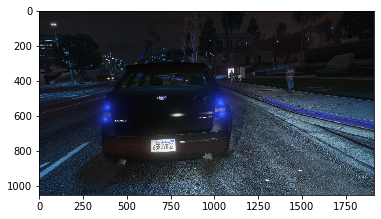

In [37]:
idx = np.random.randint(0, 500)
test_image = cv2.imread(test_image_paths[idx])
plt.imshow(test_image)
print(predictions[idx])